# OSA-CASE STUDY

### Clustering

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram,linkage
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist
import matplotlib.cm as cm
from scipy.spatial.distance import cdist
from sklearn.metrics import silhouette_samples, silhouette_score
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import AffinityPropagation
from sklearn import metrics
from itertools import cycle
from sklearn.model_selection import train_test_split

%matplotlib inline


In [2]:
data = pd.read_excel("../DATA/OSA_EXTREME_DF_MALES_REGRESSION.xlsx")

In [3]:
features_of_interest = ["Weight", "Height", "Age", "Cervical", "BMI"]
X = data[features_of_interest]
Y = data[['IAH']]

In [4]:
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)
X_normalized[0:5,]

print(X_normalized[0:5])
print(Y[0:5])

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

[[-0.65423296 -0.34624674 -1.28457197 -0.643626   -0.5709663 ]
 [ 0.9173739   1.95668533 -1.28457197 -0.04861798  0.06770698]
 [-0.32907292 -0.88811311 -0.70933293 -0.04861798  0.05241942]
 [ 2.86833414 -0.48171333 -0.05191688  0.54639004  3.53748617]
 [-1.2503597  -0.88811311  0.03026012 -0.00886797 -1.04501631]]
    IAH
0   9.0
1   2.0
2  34.0
3  60.0
4  10.0


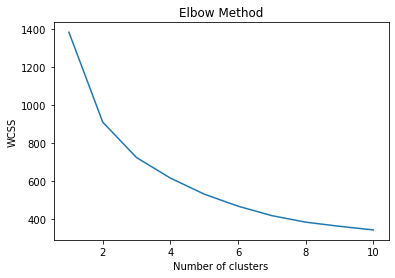

In [5]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X_normalized)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [6]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X_normalized)
kmeans.cluster_centers_

array([[-0.64139769, -0.71165005,  0.93636974, -0.3098452 , -0.39672508],
       [ 0.25473716,  1.04125957, -0.67197974,  0.03251948, -0.1823331 ],
       [ 2.29105726,  0.5902397 , -0.43064569,  1.45183702,  2.17369598],
       [ 0.49466585, -0.35856189,  0.50091025,  0.93044066,  0.74826647],
       [-0.84153275, -0.14898837, -0.77997632, -1.1081498 , -0.8590276 ]])

In [7]:
Centers = scaler.inverse_transform(kmeans.cluster_centers_)

df_centers = pd.DataFrame(data = Centers,
                  columns = features_of_interest) 

df_centers

,Weight,Height,Age,Cervical,BMI
0,80.236842,170.302632,59.026316,41.121937,27.674961
1,96.772727,183.242424,39.454545,42.272727,28.837761
2,134.347826,179.913043,42.391304,47.043478,41.616178
3,101.200000,172.909091,53.727273,45.290909,33.885063
4,76.543860,174.456140,38.140351,38.438596,25.167567


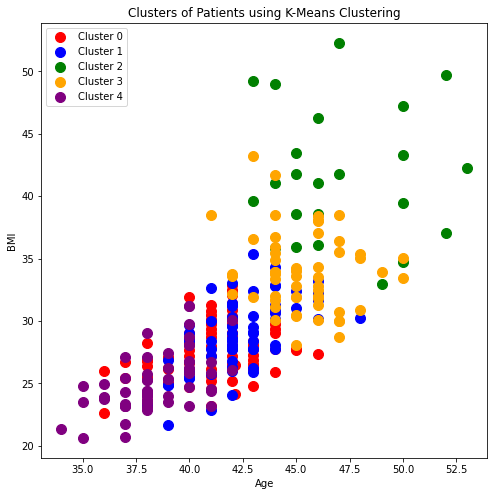

In [8]:
plt.figure(figsize=(8,8))
plt.scatter(X.iloc[y_kmeans == 0, 3], X.iloc[y_kmeans == 0, 4], s = 100, c = 'red', label = 'Cluster 0')
plt.scatter(X.iloc[y_kmeans == 1, 3], X.iloc[y_kmeans == 1, 4], s = 100, c = 'blue', label = 'Cluster 1')
plt.scatter(X.iloc[y_kmeans == 2, 3], X.iloc[y_kmeans == 2, 4], s = 100, c = 'green', label = 'Cluster 2')
plt.scatter(X.iloc[y_kmeans == 3, 3], X.iloc[y_kmeans == 3, 4], s = 100, c = 'orange', label = 'Cluster 3')
plt.scatter(X.iloc[y_kmeans == 4, 3], X.iloc[y_kmeans == 4, 4], s = 100, c = 'purple', label = 'Cluster 4')
plt.title('Clusters of Patients using K-Means Clustering')
plt.xlabel('Age')
plt.ylabel('BMI')
plt.legend()
plt.show()

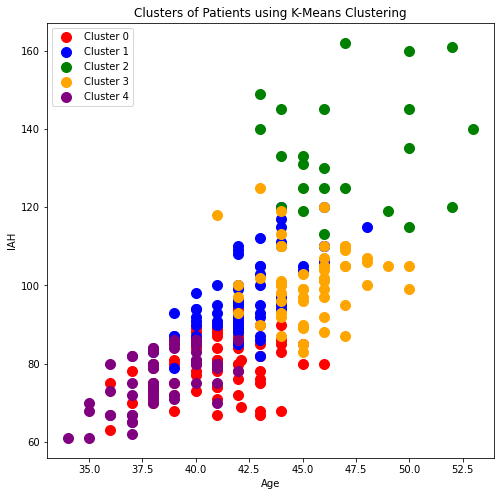

In [9]:
plt.figure(figsize=(8,8))
plt.scatter(X.iloc[y_kmeans == 0, 3], X.iloc[y_kmeans == 0, 0], s = 100, c = 'red', label = 'Cluster 0')
plt.scatter(X.iloc[y_kmeans == 1, 3], X.iloc[y_kmeans == 1, 0], s = 100, c = 'blue', label = 'Cluster 1')
plt.scatter(X.iloc[y_kmeans == 2, 3], X.iloc[y_kmeans == 2, 0], s = 100, c = 'green', label = 'Cluster 2')
plt.scatter(X.iloc[y_kmeans == 3, 3], X.iloc[y_kmeans == 3, 0], s = 100, c = 'orange', label = 'Cluster 3')
plt.scatter(X.iloc[y_kmeans == 4, 3], X.iloc[y_kmeans == 4, 0], s = 100, c = 'purple', label = 'Cluster 4')
plt.title('Clusters of Patients using K-Means Clustering')
plt.xlabel('Age')
plt.ylabel('IAH')
plt.legend()
plt.show()

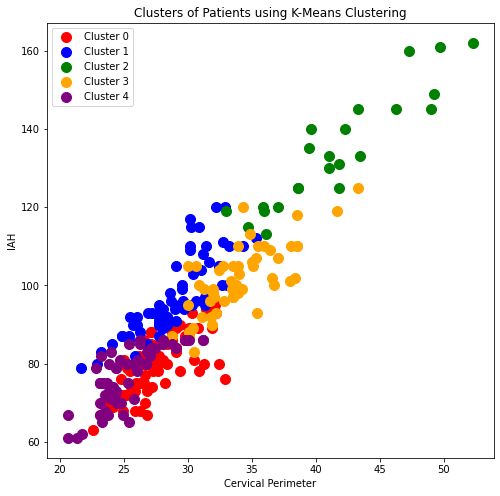

In [10]:
plt.figure(figsize=(8,8))
plt.scatter(X.iloc[y_kmeans == 0, 4], X.iloc[y_kmeans == 0, 0], s = 100, c = 'red', label = 'Cluster 0')
plt.scatter(X.iloc[y_kmeans == 1, 4], X.iloc[y_kmeans == 1, 0], s = 100, c = 'blue', label = 'Cluster 1')
plt.scatter(X.iloc[y_kmeans == 2, 4], X.iloc[y_kmeans == 2, 0], s = 100, c = 'green', label = 'Cluster 2')
plt.scatter(X.iloc[y_kmeans == 3, 4], X.iloc[y_kmeans == 3, 0], s = 100, c = 'orange', label = 'Cluster 3')
plt.scatter(X.iloc[y_kmeans == 4, 4], X.iloc[y_kmeans == 4, 0], s = 100, c = 'purple', label = 'Cluster 4')
plt.title('Clusters of Patients using K-Means Clustering')
plt.xlabel('Cervical Perimeter')
plt.ylabel('IAH')
plt.legend()
plt.show()

In [11]:
distance_matrix = linkage(X_normalized, "ward")
c, coph_distance = cophenet(distance_matrix, pdist(X_normalized))
print ("Cophenet Distance = " + str(c))

Cophenet Distance = 0.5881004148942266


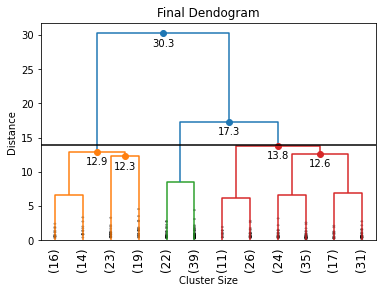

In [12]:
def dendrogram_tune(*args, **kwargs):
    max_d = kwargs.pop("max_d", None)
    if max_d and 'color_threshold' not in kwargs:
        kwargs['color_threshold'] = max_d
    annotate_above = kwargs.pop('annotate_above', 0)
    
    ddata = dendrogram(*args,**kwargs)
        
    if not kwargs.get('no_plot', False):
        plt.title("Final Dendogram")
        plt.xlabel("Cluster Size")
        plt.ylabel("Distance")
        for i, d, c in zip(ddata['icoord'], ddata['dcoord'], ddata['color_list']):
            x = 0.5 * sum(i[1:3])
            y = d[1]
            if y > annotate_above:
                plt.plot(x,y,'o',c = c)
                plt.annotate('%.3g' %y, (x,y), xytext = (0,-5),
                            textcoords = "offset points", va = "top", ha = "center")            
    if max_d:
        plt.axhline(y = max_d, c = 'k')
        
    return ddata



dendrogram_tune(distance_matrix, truncate_mode = 'lastp',p = 12, leaf_rotation = 90., leaf_font_size = 12.,
                show_contracted = True, annotate_above = 10, max_d = 14)
plt.show()

* For k value =  2  the mean of the silhouette is : 0.3208703516107731
   - For i =  1  the cluster silhouette is :  0.23924791518656155
   - For i =  2  the cluster silhouette is :  0.36015387716253267


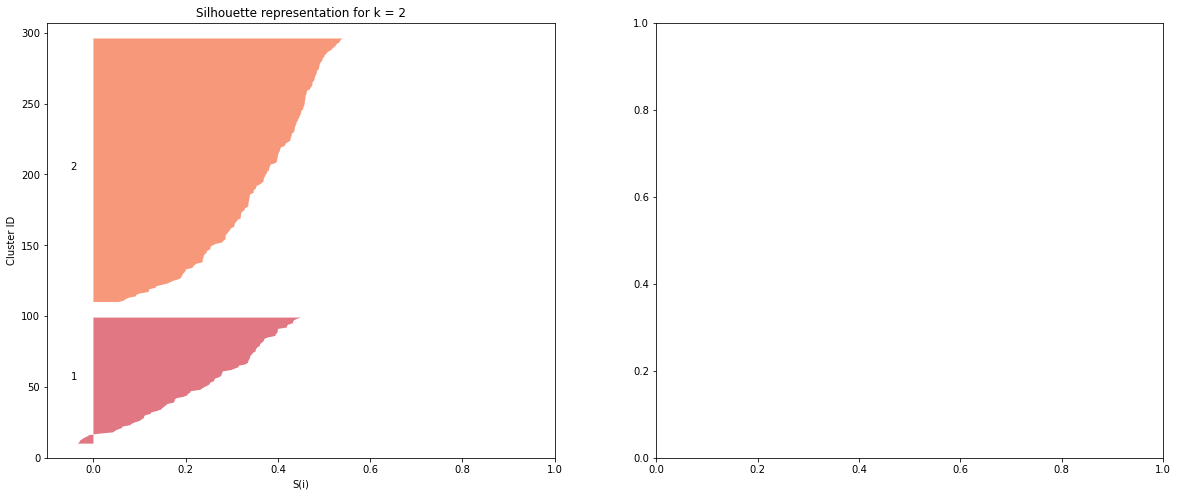

* For k value =  3  the mean of the silhouette is : 0.2531928637732324
   - For i =  1  the cluster silhouette is :  0.20624878132600083
   - For i =  2  the cluster silhouette is :  0.23914830009343707
   - For i =  3  the cluster silhouette is :  0.2988172484716785


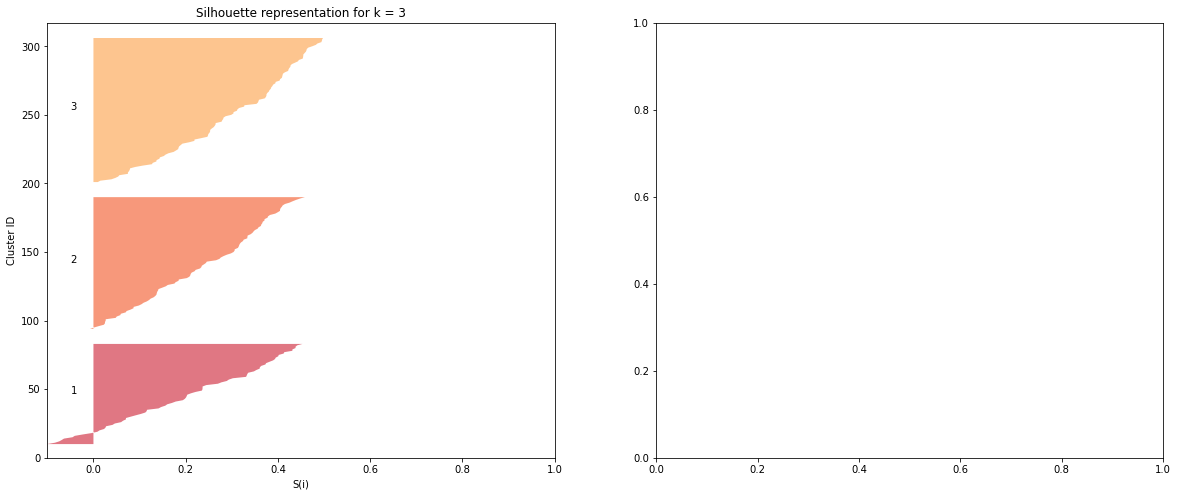

* For k value =  4  the mean of the silhouette is : 0.2466055548759799
   - For i =  1  the cluster silhouette is :  0.33293146846752236
   - For i =  2  the cluster silhouette is :  0.20104536846495574
   - For i =  3  the cluster silhouette is :  0.22185894097191836
   - For i =  4  the cluster silhouette is :  0.20802713346832402


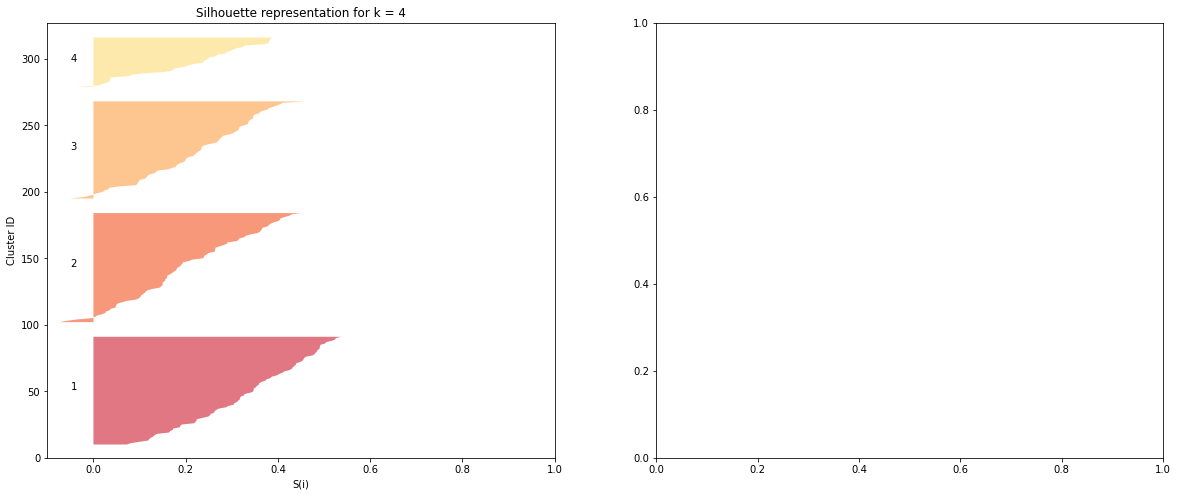

* For k value =  5  the mean of the silhouette is : 0.2408822474425926
   - For i =  1  the cluster silhouette is :  0.2189727124690332
   - For i =  2  the cluster silhouette is :  0.24953235489514036
   - For i =  3  the cluster silhouette is :  0.25136454689481513
   - For i =  4  the cluster silhouette is :  0.2608093871337325
   - For i =  5  the cluster silhouette is :  0.22941062948796692


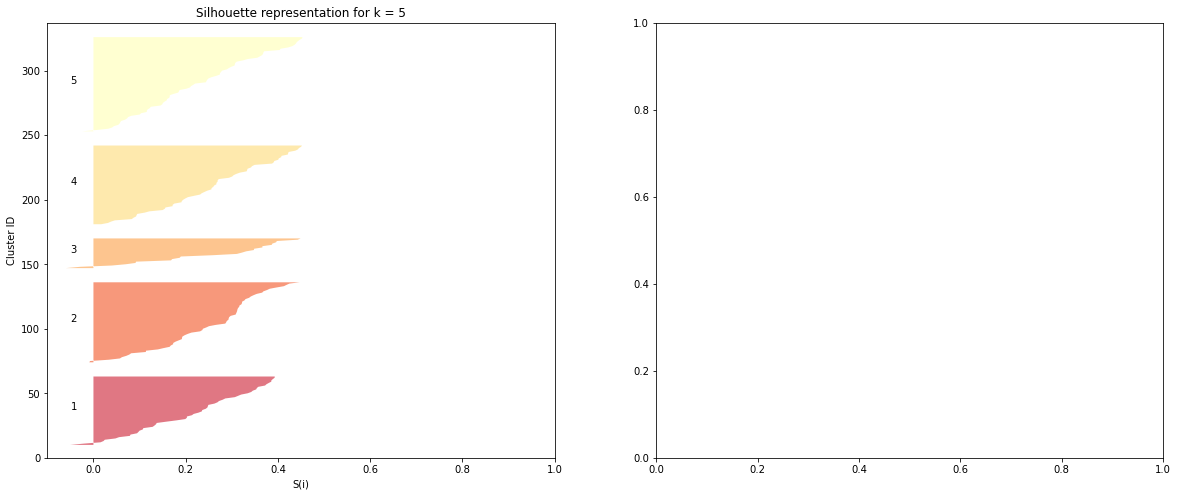

* For k value =  6  the mean of the silhouette is : 0.23899615519125839
   - For i =  1  the cluster silhouette is :  0.25966728979043746
   - For i =  2  the cluster silhouette is :  0.20720722225980287
   - For i =  3  the cluster silhouette is :  0.212284074403536
   - For i =  4  the cluster silhouette is :  0.24102495682017652
   - For i =  5  the cluster silhouette is :  0.28861835597757834
   - For i =  6  the cluster silhouette is :  0.2249989448372761


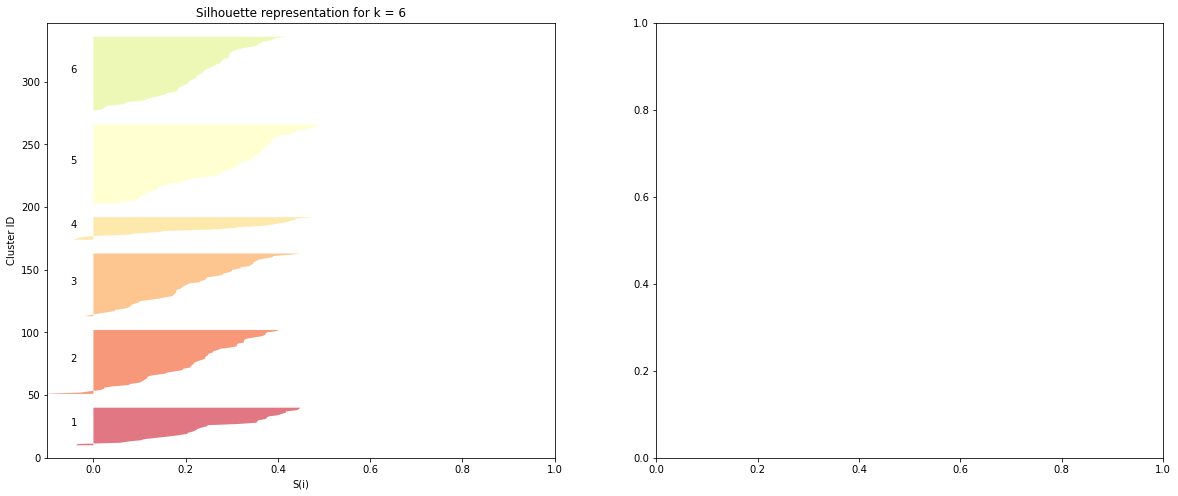

* For k value =  7  the mean of the silhouette is : 0.24436406455660037
   - For i =  1  the cluster silhouette is :  0.1684869947764721
   - For i =  2  the cluster silhouette is :  0.24630022183695713
   - For i =  3  the cluster silhouette is :  0.19584586138191667
   - For i =  4  the cluster silhouette is :  0.32989546250454366
   - For i =  5  the cluster silhouette is :  0.27237219929489825
   - For i =  6  the cluster silhouette is :  0.26114810293244445
   - For i =  7  the cluster silhouette is :  0.282310941675549


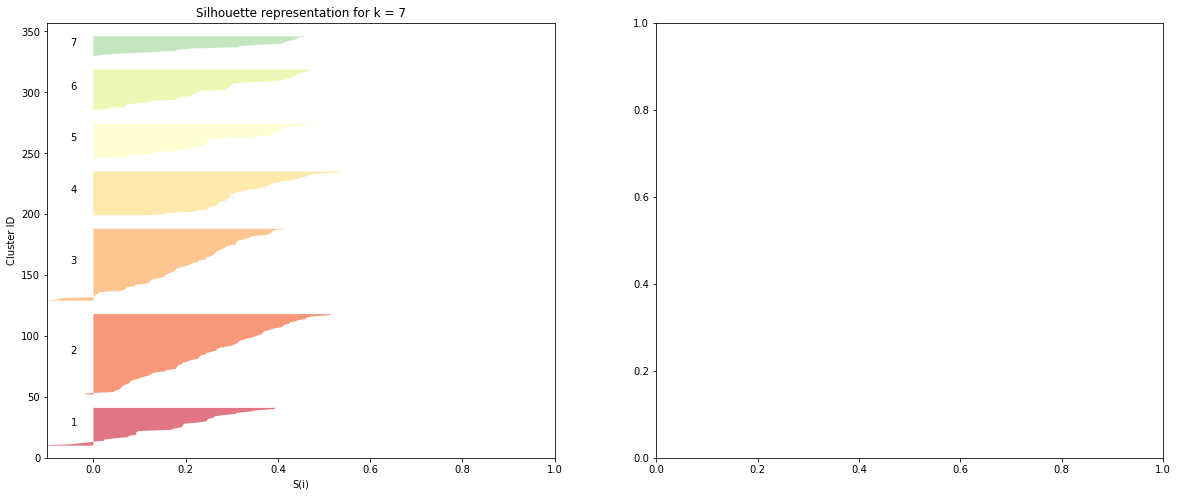

* For k value =  8  the mean of the silhouette is : 0.24251974422397785
   - For i =  1  the cluster silhouette is :  0.25456585105103124
   - For i =  2  the cluster silhouette is :  0.1605451544581305
   - For i =  3  the cluster silhouette is :  0.2528808629560079
   - For i =  4  the cluster silhouette is :  0.2860192080302
   - For i =  5  the cluster silhouette is :  0.28298877997866917
   - For i =  6  the cluster silhouette is :  0.2504867446408003
   - For i =  7  the cluster silhouette is :  0.25344093539069423
   - For i =  8  the cluster silhouette is :  0.19487492636933068


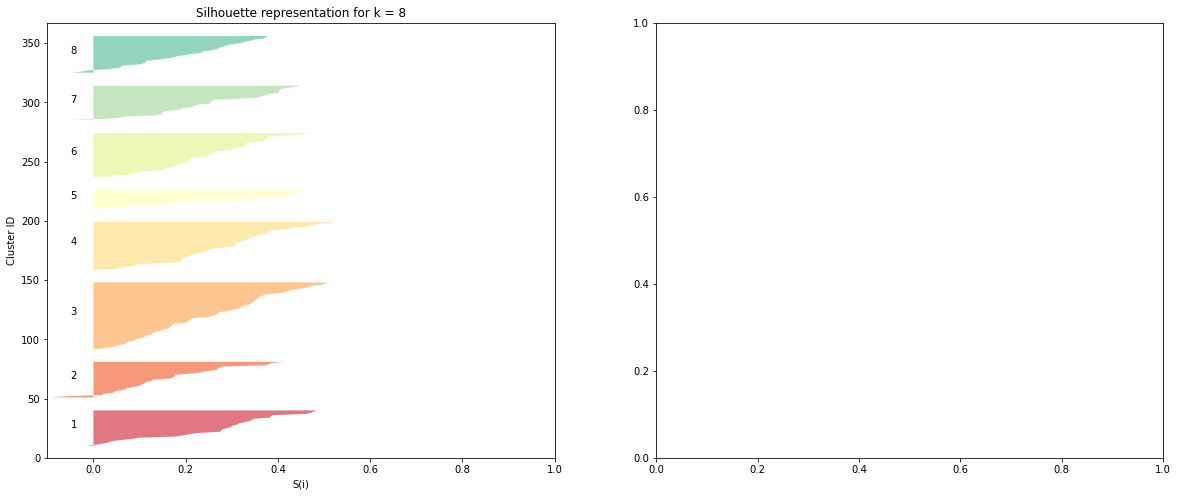

* For k value =  9  the mean of the silhouette is : 0.22387855309639887
   - For i =  1  the cluster silhouette is :  0.18879109125802024
   - For i =  2  the cluster silhouette is :  0.22493313623477565
   - For i =  3  the cluster silhouette is :  0.2293870863797604
   - For i =  4  the cluster silhouette is :  0.23312234871665025
   - For i =  5  the cluster silhouette is :  0.2772159309345995
   - For i =  6  the cluster silhouette is :  0.18885535107727344
   - For i =  7  the cluster silhouette is :  0.22803844947447507
   - For i =  8  the cluster silhouette is :  0.3064341234204083
   - For i =  9  the cluster silhouette is :  0.15648595481522137


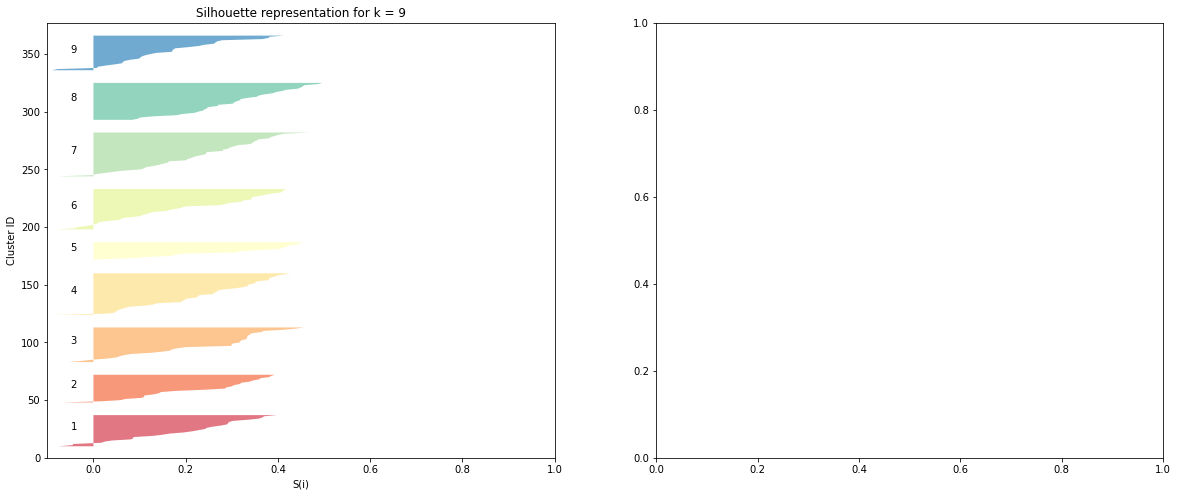

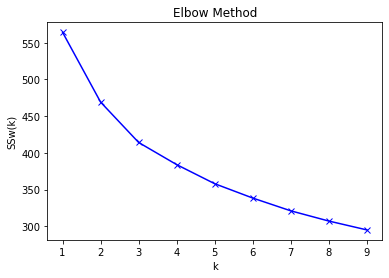

In [13]:
max_number_clusters = 10 
K = range(1,max_number_clusters)
ssw= []
color_map = cm.get_cmap("Spectral")
color_palette = [color_map(float(i)/max_number_clusters) for i in K]
centroid = [sum(X_normalized)/len(X_normalized) for i in K]
sst = sum(np.min(cdist(X_normalized, centroid, "euclidean"), axis = 1))

for k in K:
    kmeanModel = KMeans(n_clusters = k).fit(X_normalized)
    
    centers = pd.DataFrame(kmeanModel.cluster_centers_)
    labels = kmeanModel.labels_
    
    ssw_k = sum(np.min(cdist(X_normalized, kmeanModel.cluster_centers_, "euclidean"), axis = 1))
    ssw.append(ssw_k)
    
    label_color = [color_palette[i] for i in labels]
    
    if 1 < k < len(X_normalized):
        fig, (axis1,axis2) = plt.subplots(1,2)
        fig.set_size_inches(20,8)

        axis1.set_xlim([-0.1, 1.0])
        axis1.set_ylim([0, len(X_normalized)+ (k + 1)* 10])
    
        silhouette_avg = silhouette_score(X_normalized, labels)
        print("* For k value = ",k, " the mean of the silhouette is :",silhouette_avg)
        sample_silhouette_values = silhouette_samples(X_normalized, labels)
        
        y_lower = 10
        for i in range(k):
            # We add the silhouette of the i-th cluster
            ith_cluster_sv = sample_silhouette_values[labels == i]
            print("   - For i = ", i+1, " the cluster silhouette is : ", np.mean(ith_cluster_sv))
            # We order the silhouettes of the i-th cluster downwards
            ith_cluster_sv.sort()
        
            # We calculate where to place the first silhouette on the vertical axis
            ith_cluster_size = ith_cluster_sv.shape[0]
            y_upper = y_lower + ith_cluster_size
            
            # We choose the color of the cluster
            color = color_palette[i]
            
            # We painted the silhouette of the i-th cluster
            axis1.fill_betweenx(np.arange(y_lower, y_upper),
                               0, ith_cluster_sv, facecolor = color, alpha = 0.7)
            
            
            # We label this cluster with the number in the middle
            axis1.text(-0.05, y_lower + 0.5 * ith_cluster_size, str(i + 1))
            
            # We calculate the new y_lower for the next cluster on the grapho
            y_lower = y_upper + 10 
            
        axis1.set_title("Silhouette representation for k = %s" %str(k))
        axis1.set_xlabel("S(i)")
        axis1.set_ylabel("Cluster ID")
        plt.show()

# Elbow Method

plt.plot(K, ssw, "bx-")
plt.xlabel("k")
plt.ylabel("SSw(k)")
plt.title("Elbow Method")
plt.show()


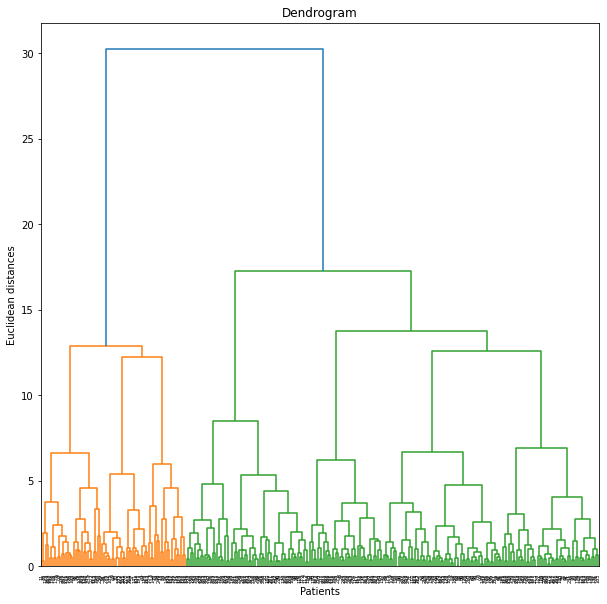

In [14]:
plt.figure(figsize=(10,10))
dendrogram = sch.dendrogram(sch.linkage(X_normalized, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Patients')
plt.ylabel('Euclidean distances')
plt.show()

In [15]:
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X_normalized)

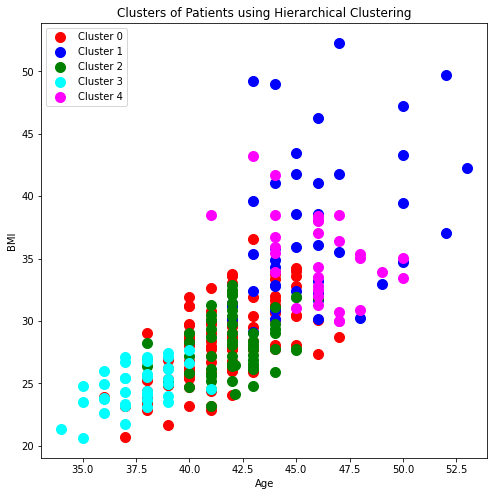

In [16]:
plt.figure(figsize=(8,8))
plt.scatter(X.iloc[y_hc == 0, 3], X.iloc[y_hc == 0, 4], s = 100, c = 'red', label = 'Cluster 0')
plt.scatter(X.iloc[y_hc == 1, 3], X.iloc[y_hc == 1, 4], s = 100, c = 'blue', label = 'Cluster 1')
plt.scatter(X.iloc[y_hc == 2, 3], X.iloc[y_hc == 2, 4], s = 100, c = 'green', label = 'Cluster 2')
plt.scatter(X.iloc[y_hc == 3, 3], X.iloc[y_hc == 3, 4], s = 100, c = 'cyan', label = 'Cluster 3')
plt.scatter(X.iloc[y_hc == 4, 3], X.iloc[y_hc == 4, 4], s = 100, c = 'magenta', label = 'Cluster 4')
plt.title('Clusters of Patients using Hierarchical Clustering')
plt.xlabel('Age')
plt.ylabel('BMI')
plt.legend()
plt.show()

/Users/isabel.rodriguez/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_affinity_propagation.py:148: FutureWarning: 'random_state' has been introduced in 0.23. It will be set to None starting from 1.0 (renaming of 0.25) which means that results will differ at every function call. Set 'random_state' to None to silence this warning, or to 0 to keep the behavior of versions <0.23.
  warnings.warn(
/Users/isabel.rodriguez/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_affinity_propagation.py:148: FutureWarning: 'random_state' has been introduced in 0.23. It will be set to None starting from 1.0 (renaming of 0.25) which means that results will differ at every function call. Set 'random_state' to None to silence this warning, or to 0 to keep the behavior of versions <0.23.
  warnings.warn(


Cluste centers ID: [ 55  94 102 103 141 157 184]
Then number of clusters according to the affinity model is: 7
Estimated Number of Clusters: 7 
Homogeneity: 1.000 
Completeness: 1.000 
V-measure: 1.000 
R2 Adjusted: 1.000
Adjusted Mutual Information: 1.000 
Silhouette Coefficient: 0.318


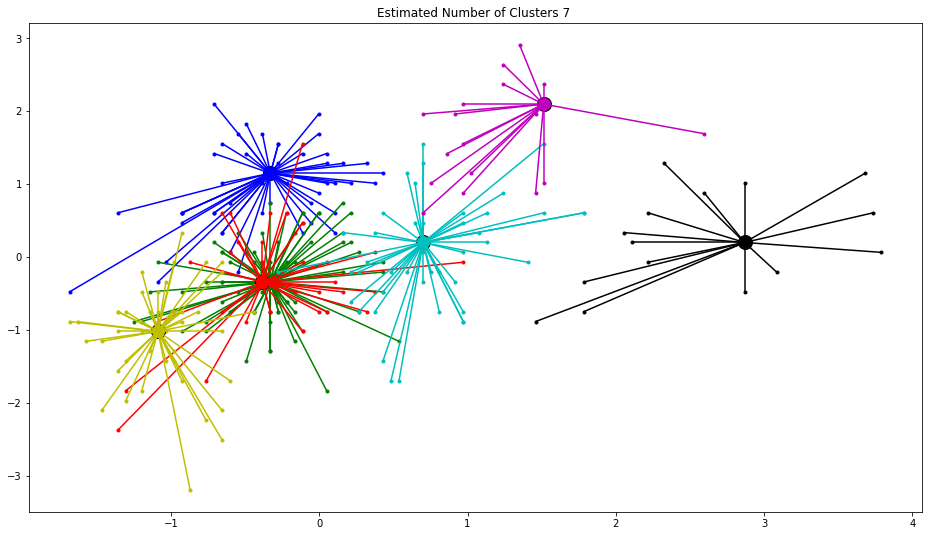

In [17]:
# AFFINITI PROPAGATION ANALYSIS

affinity_model = AffinityPropagation(preference = -50).fit(X_normalized)
centers_ID = affinity_model.cluster_centers_indices_
print ("Cluste centers ID: " + str(centers_ID))
labels = affinity_model.labels_

n_cluster_affinity = len(centers_ID)
print ("Then number of clusters according to the affinity model is: " + str(n_cluster_affinity))

# GODD WAY FOR REPRESENT THIS ANALYSIS ADAPTED

def report_affinity_propagation(X_normalized):
    affinity_model = AffinityPropagation(preference = -50).fit(X_normalized)
    centers_ID = affinity_model.cluster_centers_indices_
    n_cluster_affinity = len(centers_ID)
    cluster_labels = affinity_model.labels_
    
    print("Estimated Number of Clusters: %d " % n_cluster_affinity)
    print("Homogeneity: %0.3f " % metrics.homogeneity_score(labels, cluster_labels))
    print("Completeness: %0.3f " % metrics.completeness_score(labels, cluster_labels))
    print("V-measure: %0.3f " % metrics.v_measure_score(labels, cluster_labels))
    print("R2 Adjusted: %0.3f" % metrics.adjusted_rand_score(labels, cluster_labels))
    print("Adjusted Mutual Information: %0.3f " % metrics.adjusted_mutual_info_score(labels, cluster_labels))
    print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(X_normalized, labels, metric = "sqeuclidean"))
    
    plt.figure(figsize = (16,9))
    plt.clf()
    
    colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
    for k, col in zip(range(n_cluster_affinity), colors):
        class_members = (cluster_labels == k)
        cluster_center = X_normalized [centers_ID [k]]
        plt.plot(X_normalized[class_members, 0], X_normalized [class_members, 1], col + '.')
        plt.plot(cluster_center [0], cluster_center [1], 'o', markerfacecolor = col, markeredgecolor = 'k', markersize = 14)
        for x in X_normalized[class_members]:
            plt.plot([cluster_center [0], x[0]], [cluster_center [1], x[1]], col)
            
    plt.title("Estimated Number of Clusters %d " % n_cluster_affinity)
    plt.show()

report_affinity_propagation(X_normalized)